<a href="https://colab.research.google.com/github/NeDarbandsari/WSPTrafficView/blob/main/WSP13_08-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/aliasgharkhani/SLiMe.git

Cloning into 'SLiMe'...
remote: Enumerating objects: 322, done.
remote: Counting objects: 100% (322/322), done.
remote: Compressing objects: 100% (225/225), done.
remote: Total 322 (delta 118), reused 272 (delta 89), pack-reused 0
Receiving objects: 100% (322/322), 26.67 MiB | 7.75 MiB/s, done.
Resolving deltas: 100% (118/118), done.


In [4]:
cd SLiMe

/content/SLiMe


- remove `torch==1.13.1` line
- replace `pytorch_lightning==2.0.2` with `pytorch_lightning==2.0.9`
- replace `opencv_python==4.5.1.48` with `opencv_python`

in `SLiMe/requirements.txt` file before installing the requirements.

In [5]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.6/113.6 kB 9.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metad

In [6]:
pip install "jax[cuda12_pip]==0.4.23" -f https://storage.googleapis.com/jax-releases/jax_cuda_releases.html

Looking in links: https://storage.googleapis.com/jax-releases/jax_cuda_releases.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.8/131.8 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 73.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 368.0/368.0 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 76.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 85.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.7/897.7 kB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.5/192.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 MB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 217.5/217.5 MB 3.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-cusparse-cu12
    Found existing installation: nvidia-cusparse-cu12 12.1.0.106
    Uninstalling nvidia-cusparse-cu12-12.1.0.106:
      Successfully uninstalled nvidia

In [7]:
# No need to restart session, but in case of restarting, needed to be checked if is in SLiMe folder
!ls

diffusers  LICENSE  media  README.md  requirements.txt	src


In [8]:
class Arguments:
  def __init__(self):
    self.batch_size = 1
    self.attention_layers_to_use = ['up_blocks[1].attentions[0].transformer_blocks[0].attn2',
                                    'up_blocks[1].attentions[1].transformer_blocks[0].attn2',
                                    'up_blocks[1].attentions[2].transformer_blocks[0].attn2',
                                    'up_blocks[2].attentions[0].transformer_blocks[0].attn2',
                                    'up_blocks[2].attentions[1].transformer_blocks[0].attn2',
                                    'up_blocks[3].attentions[0].transformer_blocks[0].attn1',
                                    'up_blocks[3].attentions[1].transformer_blocks[0].attn1',
                                    'up_blocks[3].attentions[2].transformer_blocks[0].attn1']
    self.gpu_id = 0
    self.train = False
    self.part_names = None
    self.checkpoint_dir = "outputs"
    self.text_prompt = None
    self.output_dir = "outputs"
    self.dataset_name = "sample"
    self.train_data_dir = None
    self.val_data_dir = None
    self.test_data_dir = None
    self.min_crop_ratio = 0.8
    self.optimizer = "Adam"
    self.epochs = 200
    self.lr = 0.1
    self.train_mask_size = 64
    self.train_t = [5, 100]
    self.self_attention_loss_coef = 1.0
    self.sd_loss_coef = 0.005
    self.masking = "patched_masking"
    self.num_patchs_per_side = 2
    self.patch_size = 400
    self.patch_threshold = 0.2
    self.test_t = [100]
    self.test_mask_size = 512
    self.save_test_predictions = True

In [9]:
import numpy as np
import torch
import random
import colorsys
import cv2

In [ ]:
def get_random_crop_coordinates(crop_scale_range, image_width, image_height):
    rand_number = random.random()
    rand_number *= crop_scale_range[1] - crop_scale_range[0]
    rand_number += crop_scale_range[0]
    patch_size = int(rand_number * min(image_width, image_height))
    if patch_size != min(image_width, image_height):
        x_start = random.randint(0, image_width - patch_size)
        y_start = random.randint(0, image_height - patch_size)
    else:
        x_start = 0
        y_start = 0
    return x_start, x_start + patch_size, y_start, y_start + patch_size

In [10]:
def get_crops_coords(image_size, patch_size, num_patchs_per_side):
    h, w = image_size
    if num_patchs_per_side == 1:
        x_step_size = y_step_size = 0
    else:
        x_step_size = (w - patch_size) // (num_patchs_per_side - 1)
        y_step_size = (h - patch_size) // (num_patchs_per_side - 1)
    crops_coords = []
    for i in range(num_patchs_per_side):
        for j in range(num_patchs_per_side):
            y_start, y_end, x_start, x_end = (
                i * y_step_size,
                i * y_step_size + patch_size,
                j * x_step_size,
                j * x_step_size + patch_size,
            )
            crops_coords.append([y_start, y_end, x_start, x_end])
    return crops_coords

In [11]:
def generate_distinct_colors(n):
    colors = []
    if n == 1:
        return [(255, 255, 255)]
    for i in range(n):
        hue = i / n
        saturation = 0.9
        value = 0.9
        rgb = colorsys.hsv_to_rgb(hue, saturation, value)
        scaled_rgb = tuple(int(x * 255) for x in rgb)
        colors.append(scaled_rgb)
    return colors

In [12]:
def calculate_iou(prediction, mask):
    intersection = prediction * mask
    union = prediction + mask - intersection
    return intersection.sum() / (union.sum() + 1e-7)

In [13]:
def get_boundry_and_eroded_mask(mask):
    kernel = np.ones((7, 7), np.uint8)
    eroded_mask = np.zeros_like(mask)
    boundry_mask = np.zeros_like(mask)
    for part_mask_idx in np.unique(mask)[1:]:
        part_mask = np.where(mask == part_mask_idx, 1, 0)
        part_mask_erosion = cv2.erode(part_mask.astype(np.uint8), kernel, iterations=1)
        part_boundry_mask = part_mask - part_mask_erosion
        eroded_mask = np.where(part_mask_erosion > 0, part_mask_idx, eroded_mask)
        boundry_mask = np.where(part_boundry_mask > 0, part_mask_idx, boundry_mask)
    return eroded_mask, boundry_mask

In [14]:
def get_colored_segmentation(mask, boundry_mask, image, colors):
    boundry_mask_rgb = 0
    if boundry_mask is not None:
        boundry_mask_rgb = torch.repeat_interleave(boundry_mask[None, ...], 3, 0).type(
            torch.float
        )
        for j in range(3):
            for i in range(1, len(colors) + 1):
                boundry_mask_rgb[j] = torch.where(
                    boundry_mask_rgb[j] == i,
                    colors[i - 1][j] / 255,
                    boundry_mask_rgb[j],
                )
    mask_rgb = torch.repeat_interleave(mask[None, ...], 3, 0).type(torch.float)
    for j in range(3):
        for i in range(1, len(colors) + 1):
            mask_rgb[j] = torch.where(
                mask_rgb[j] == i, colors[i - 1][j] / 255, mask_rgb[j]
            )
    if boundry_mask is not None:
        return (boundry_mask_rgb * 0.6 + mask_rgb * 0.3 + image * 0.4).permute(1, 2, 0)
    else:
        return (mask_rgb * 0.6 + image * 0.4).permute(1, 2, 0)

In [15]:
!pip install pytorch_lightning

  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
Usin

In [24]:
import pytorch_lightning as pl
import torch
from PIL import Image
from torch.utils.data import DataLoader
from torch.utils.data import Dataset as TorchDataset
import albumentations as A
from albumentations.pytorch import ToTensorV2
import cv2
import numpy as np
from glob import glob
import os


class Dataset(TorchDataset):
    def __init__(
        self,
        data_dir,
        train=True,
        mask_size=512,
        num_parts=1,
        min_crop_ratio=0.5,
        dataset_name: str = "sample",
    ):
        self.image_paths = sorted(glob(os.path.join(data_dir, "*.png")))
        self.mask_paths = sorted(glob(os.path.join(data_dir, "*.npy")))
        self.train = train
        self.mask_size = mask_size
        self.num_parts = num_parts
        self.min_crop_ratio = min_crop_ratio
        self.train_transform_1 = A.Compose(
            [
                A.Resize(512, 512),
                A.HorizontalFlip(),
                A.GaussianBlur(blur_limit=(1, 5)), #Blur the input image using a Gaussian filter with a random kernel size.
            ]
        )
        if dataset_name == "celeba":
            rotation_range = (-10, 10)
        else:
            rotation_range = (-30, 30)
        self.train_transform_2 = A.Compose(
            [
                A.Resize(512, 512),
                #Rotate the input by an angle selected randomly from the uniform distribution.
                A.Rotate(
                    rotation_range,
                    border_mode=cv2.BORDER_CONSTANT, #flag that is used to specify the pixel extrapolation method
                    value=0, #padding value if border_mode is cv2.BORDER_CONSTANT.
                    mask_value=0, #padding value if border_mode is cv2.BORDER_CONSTANT applied for masks.
                ),
                ToTensorV2(),
            ]
        )
        self.current_part_idx = 0
        self.test_transform = A.Compose([A.Resize(512, 512), ToTensorV2()])

    def __getitem__(self, idx):
        image = cv2.imread(self.image_paths[idx])
        if len(image.shape) > 2 and image.shape[2] == 4:
            # convert the image from RGBA2RGB
            image = cv2.cvtColor(image, cv2.COLOR_BGRA2BGR)
        if self.train:
            mask = np.load(self.mask_paths[idx]) #load mask
            result = self.train_transform_1(image=image, mask=mask) #apply first transformations (resize, h_flip, g_blur)
            image = result["image"]
            mask = result["mask"]
            original_mask_size = np.where(mask == self.current_part_idx, 1, 0).sum() #caclulate the size of mask for current part
            mask_is_included = False
            while not mask_is_included: #making sure mask is included in the crop
                x_start, x_end, y_start, y_end = get_random_crop_coordinates(
                    (self.min_crop_ratio, 1), 512, 512
                )
                aux_mask = mask[y_start:y_end, x_start:x_end]
                if (
                    original_mask_size == 0
                    or np.where(aux_mask == self.current_part_idx, 1, 0).sum()
                    / original_mask_size
                    > 0.3
                ):
                    mask_is_included = True
            image = image[y_start:y_end, x_start:x_end]
            result = self.train_transform_2(image=image, mask=aux_mask) #applying rotation to croped image and mask
            mask, image = result["mask"], result["image"]
            mask = torch.nn.functional.interpolate(  #interpolate (down/up sample the input) to the given size
                mask[None, None, ...].type(torch.float), #add 2 new dimensions H*W => 1,1,H,W (interpolate expects tensor of size b*c*H*W and type float)
                self.mask_size,
                mode="nearest",
            )[0, 0] #resizing the tensor back to H*W
            self.current_part_idx += 1
            self.current_part_idx = self.current_part_idx % self.num_parts
            return image / 255, mask
        else:
            if len(self.mask_paths) > 0:
                mask = np.load(self.mask_paths[idx])
                result = self.test_transform(image=image, mask=mask) #resize and turn to tensor
                mask = result["mask"]
                mask = torch.nn.functional.interpolate(
                    mask[None, None, ...].type(torch.float),
                    self.mask_size,
                    mode="nearest",
                )[0, 0]
            else:
                result = self.test_transform(image=np.array(image))
                mask = 0
            image = result["image"]
            return image / 255, mask

    def __len__(self):
        return len(self.image_paths)


class DataModule(pl.LightningDataModule):
    def __init__(
        self,
        train_data_dir: str = "./data",
        val_data_dir: str = "./data",
        test_data_dir: str = "./data",
        batch_size: int = 1,
        train_mask_size: int = 256,
        test_mask_size: int = 256,
        num_parts: int = 2,
        min_crop_ratio: float = 0.5,
        dataset_name: str = "sample",
    ):
        super().__init__()
        self.train_data_dir = train_data_dir
        self.val_data_dir = val_data_dir
        self.test_data_dir = test_data_dir
        self.batch_size = batch_size
        self.train_mask_size = train_mask_size
        self.test_mask_size = test_mask_size
        self.num_parts = num_parts
        self.min_crop_ratio = min_crop_ratio
        self.dataset_name = dataset_name

    def setup(self, stage: str):
        if stage == "fit":
            self.train_dataset = Dataset(
                data_dir=self.train_data_dir,
                train=True,
                mask_size=self.train_mask_size,
                num_parts=self.num_parts,
                min_crop_ratio=self.min_crop_ratio,
                dataset_name=self.dataset_name,
            )
            self.val_dataset = Dataset(
                data_dir=self.val_data_dir,
                train=False,
                mask_size=self.test_mask_size,
            )
        elif stage == "test":
            self.test_dataset = Dataset(
                data_dir=self.test_data_dir,
                train=False,
                mask_size=self.test_mask_size,
            )

    def train_dataloader(self):
        return DataLoader(
            self.train_dataset, batch_size=self.batch_size, num_workers=8, shuffle=True
        )

    def val_dataloader(self):
        return DataLoader(
            self.val_dataset, batch_size=self.batch_size, num_workers=8, shuffle=False
        )

    def test_dataloader(self):
        return DataLoader(
            self.test_dataset, batch_size=self.batch_size, num_workers=8, shuffle=False
        )


In [25]:
from transformers import CLIPTextModel, CLIPTokenizer, logging

from diffusers import AutoencoderKL, UNet2DConditionModel, DDIMScheduler

# suppress partial model loading warning
logging.set_verbosity_error()

import torch
import torch.nn as nn
import torch.nn.functional as F

import math
from copy import deepcopy


class StableDiffusion(nn.Module):
    def __init__(
        self,
        sd_version="2.0",
        step_guidance=None,
        attention_layers_to_use=[],
    ):
        super().__init__()

        self.sd_version = sd_version
        print(f"[INFO] loading stable diffusion...")

        if self.sd_version == "2.1":
            model_key = "stabilityai/stable-diffusion-2-1-base"
            # model_key = "stabilityai/stable-diffusion-2-base"
        elif self.sd_version == "1.5":
            model_key = "runwayml/stable-diffusion-v1-5"
        elif self.sd_version == "1.4":
            model_key = "CompVis/stable-diffusion-v1-4"
        else:
            raise ValueError(
                f"Stable-diffusion version {self.sd_version} not supported."
            )

        # Create model
        self.vae = AutoencoderKL.from_pretrained(model_key, subfolder="vae")
        self.tokenizer = CLIPTokenizer.from_pretrained(model_key, subfolder="tokenizer")
        self.text_encoder = CLIPTextModel.from_pretrained(
            model_key, subfolder="text_encoder"
        )
        self.unet = UNet2DConditionModel.from_pretrained(model_key, subfolder="unet")

        for param in self.vae.parameters():
            param.requires_grad = False
        for param in self.text_encoder.parameters():
            param.requires_grad = False
        for param in self.unet.parameters():
            param.requires_grad = False

        self.vae.eval()
        self.text_encoder.eval()
        self.unet.eval()
        del self.vae.decoder # remove the decoder object
        self.scheduler = DDIMScheduler.from_config(model_key, subfolder="scheduler")

        self.num_train_timesteps = self.scheduler.config.num_train_timesteps
        self.min_step = int(self.num_train_timesteps * 0.020)
        self.max_step = int(self.num_train_timesteps * 0.980)
        if step_guidance is not None:
            self.min_step, self.max_step = step_guidance

        self.alphas = self.scheduler.alphas_cumprod  # for convenience, is this needed?
        self.device = None
        self.device1 = None
        print(f"[INFO] loaded stable diffusion!")

        self.noise = None

        self.attention_maps = {}

        def create_nested_hook_for_attention_modules(n):
            def hook(module, input, output):
                self.attention_maps[n] = output[1]

            return hook

        self.handles = []
        for module in attention_layers_to_use:
            self.handles.append(
                eval("self.unet." + module).register_forward_hook(
                    create_nested_hook_for_attention_modules(module)
                )
            )

    def change_hooks(self, attention_layers_to_use):
        for handle in self.handles:
            handle.remove()
        self.handles = []
        self.attention_maps = {}

        def create_nested_hook_for_attention_modules_with_detach(n):
            def hook(module, input, output):
                self.attention_maps[n] = output[1].detach()

            return hook

        for module in attention_layers_to_use:
            self.handles.append(
                eval("self.unet." + module).register_forward_hook(
                    create_nested_hook_for_attention_modules_with_detach(module)
                )
            )

    def setup(self, device, device1=None): #move models to available device (cpu, gpu)
        self.device1 = device if device1 is None else device1
        self.vae = self.vae.to(device)
        self.unet = self.unet.to(self.device1)
        self.alphas = self.alphas.to(device)
        self.device = device

    def get_text_embeds(self, prompt, negative_prompt, **kwargs): #negative prompt is empty string ""
        # Tokenize text and get embeddings
        text_input = self.tokenizer(
            prompt,
            padding="max_length",
            max_length=self.tokenizer.model_max_length,
            truncation=True,
            return_tensors="pt",
        )

        with torch.set_grad_enabled(False): #todo: arnt we training the text embeding?????????
            text_embeddings = self.text_encoder(text_input.input_ids)[0]

        # Do the same for unconditional embeddings
        uncond_input = self.tokenizer(
            negative_prompt,
            padding="max_length",
            max_length=self.tokenizer.model_max_length,
            return_tensors="pt",
        )

        with torch.set_grad_enabled(False):
            uncond_embeddings = self.text_encoder(uncond_input.input_ids)[0]

        return uncond_embeddings, text_embeddings

    def get_attention_map( #todo:review this function again, understand shapes
        self,
        raw_attention_maps,
        output_size=256,
        token_ids=(2,),
        average_layers=True,
        train=True,
        apply_softmax=True,
    ):
        cross_attention_maps = {}
        self_attention_maps = {}
        resnets = {}

        for layer in raw_attention_maps:
            if layer.endswith("attn2"):  # cross attentions
                split_attention_maps = torch.stack(
                    raw_attention_maps[layer].chunk(2), dim=0
                )
                _, channel, img_embed_len, text_embed_len = split_attention_maps.shape
                if train:
                    if apply_softmax:
                        reshaped_split_attention_maps = (
                            split_attention_maps[:, :, :, torch.tensor(list(token_ids))]
                            .softmax(dim=-1)
                            .reshape(
                                2,  # because of chunk
                                channel,
                                int(math.sqrt(img_embed_len)),
                                int(math.sqrt(img_embed_len)),
                                len(token_ids),
                            )
                            .permute(0, 1, 4, 2, 3)
                        )
                    else:
                        reshaped_split_attention_maps = (
                            split_attention_maps[:, :, :, torch.tensor(list(token_ids))]
                            .reshape(
                                2,  # because of chunk
                                channel,
                                int(math.sqrt(img_embed_len)),
                                int(math.sqrt(img_embed_len)),
                                len(token_ids),
                            )
                            .permute(0, 1, 4, 2, 3)
                        )
                else:
                    reshaped_split_attention_maps = (
                        split_attention_maps.softmax(dim=-1)[
                            :, :, :, torch.tensor(list(token_ids))
                        ]
                        .reshape(
                            2,  # because of chunk
                            channel,
                            int(math.sqrt(img_embed_len)),
                            int(math.sqrt(img_embed_len)),
                            len(token_ids),
                        )
                        .permute(0, 1, 4, 2, 3)
                    )

                resized_reshaped_split_attention_maps_0 = (
                    torch.nn.functional.interpolate(
                        reshaped_split_attention_maps[0],
                        size=output_size,
                        mode="bilinear",
                    ).mean(dim=0)
                )
                resized_reshaped_split_attention_maps_1 = (
                    torch.nn.functional.interpolate(
                        reshaped_split_attention_maps[1],
                        size=output_size,
                        mode="bilinear",
                    ).mean(dim=0)
                )
                resized_reshaped_split_attention_maps = torch.stack(
                    [
                        resized_reshaped_split_attention_maps_0,
                        resized_reshaped_split_attention_maps_1,
                    ],
                    dim=0,
                )
                cross_attention_maps[layer] = resized_reshaped_split_attention_maps

            elif layer.endswith("attn1"):  # self attentions
                channel, img_embed_len, img_embed_len = raw_attention_maps[layer].shape
                split_attention_maps = raw_attention_maps[layer][channel // 2 :]
                reshaped_split_attention_maps = (
                    split_attention_maps.softmax(dim=-1)
                    .reshape(
                        # 2,  # because of chunk
                        channel // 2,
                        int(math.sqrt(img_embed_len)),
                        int(math.sqrt(img_embed_len)),
                        img_embed_len,
                    )
                    .permute(0, 3, 1, 2)
                )
                resized_reshaped_split_attention_maps = torch.nn.functional.interpolate(
                    reshaped_split_attention_maps, size=output_size, mode="bilinear"
                )
                resized_reshaped_split_attention_maps = (
                    resized_reshaped_split_attention_maps.mean(dim=0)
                )
                self_attention_maps[layer] = resized_reshaped_split_attention_maps
            elif layer.endswith("conv1") or layer.endswith("conv2"):  # resnets
                resnets[layer] = raw_attention_maps[layer].detach()
        sd_cross_attention_maps = [None, None]
        sd_self_attention_maps = None

        if len(cross_attention_maps.values()) > 0:
            if average_layers:
                sd_cross_attention_maps = (
                    torch.stack(list(cross_attention_maps.values()), dim=0)
                    .mean(dim=0)
                    .to(self.device)
                )
            else:
                sd_cross_attention_maps = torch.stack(
                    list(cross_attention_maps.values()), dim=1
                ).to(self.device)
        if len(self_attention_maps.values()) > 0:
            sd_self_attention_maps = torch.stack(
                list(self_attention_maps.values()), dim=0
            ).mean(dim=0)

        if len(resnets.values()) > 0:
            r = list(map(lambda x: x.to(self.device), list(resnets.values())))

        return (
            sd_cross_attention_maps[0],
            sd_cross_attention_maps[1],
            sd_self_attention_maps,
        )

    def train_step(
        self,
        text_embeddings,
        input_image,
        guidance_scale=100,
        t=None,
        generate_new_noise=True,
        attention_map=None,
        latents=None,
        attention_output_size=256,
        token_ids=(2,),
        average_layers=True,
        train=True,
        apply_softmax=True,
    ):
        # torch.cuda.synchronize(); print(f'[TIME] guiding: interp {time.time() - _t:.4f}s')
        # reshaping image into 512*512 if needed
        if not (input_image.shape[-2] == 512 and input_image.shape[-1] == 512):
            input_image = F.interpolate(
                input_image, (512, 512), mode="bilinear", align_corners=False
            )
        # timestep ~ U(0.02, 0.98) to avoid very high/low noise level
        if len(t) == 2:
            t = torch.randint(t[0], t[1] + 1, [1], dtype=torch.long)
        t = t.to(self.device)
        # encode image into latents with vae, requires grad!
        # _t = time.time()
        if latents is None:
            latents = self.encode_imgs(input_image)
        if attention_map is not None:
            latents = latents * attention_map.to(self.device)
        # torch.cuda.synchronize(); print(f'[TIME] guiding: vae enc {time.time() - _t:.4f}s')
        # predict the noise residual with unet, NO grad!
        # _t = time.time()
        with torch.set_grad_enabled(True):
            # add noise
            if generate_new_noise:
                noise = torch.randn_like(latents).to(self.device)
                self.noise = noise
            else:
                noise = self.noise.to(self.device)
            latents_noisy = self.scheduler.add_noise(latents, noise, t)
            # pred noise
            latent_model_input = torch.cat([latents_noisy] * 2)
            noise_pred_ = self.unet(
                latent_model_input.to(self.device1),
                t.to(self.device1),
                encoder_hidden_states=text_embeddings.to(self.device1),
            ).sample.to(self.device)
            # unet_features = list(self.unet_features.values())


        # torch.cuda.synchronize(); print(f'[TIME] guiding: unet {time.time() - _t:.4f}s')
        (
            sd_cross_attention_maps1,
            sd_cross_attention_maps2,
            sd_self_attention_maps,
        ) = self.get_attention_map(
            self.attention_maps,
            output_size=attention_output_size,
            token_ids=token_ids,
            average_layers=average_layers,
            train=train,
            apply_softmax=apply_softmax,
        )
        self.attention_maps = {}

        noise_pred_uncond, noise_pred_text = noise_pred_.chunk(2)
        noise_pred = noise_pred_uncond + guidance_scale * (
            noise_pred_text - noise_pred_uncond
        )
        loss = F.mse_loss(noise_pred, noise, reduction="none").mean([1, 2, 3]).mean() #SD noise prediction loss
        return (
            loss,
            sd_cross_attention_maps1,
            sd_cross_attention_maps2,
            sd_self_attention_maps,
        )

    def produce_latents(
        self,
        text_embeddings,
        height=512,
        width=512,
        num_inference_steps=50,
        guidance_scale=7.5,
        latents=None,
    ):
        if latents is None:
            latents = torch.randn(
                (
                    text_embeddings.shape[0] // 2,
                    self.unet.in_channels,
                    height // 8,
                    width // 8,
                ),
                device=self.device,
            )

        self.scheduler.set_timesteps(num_inference_steps)
        all_attention_maps = []

        with torch.autocast("cuda"):
            for i, t in enumerate(self.scheduler.timesteps):
                # expand the latents if we are doing classifier-free guidance to avoid doing two forward passes.
                latent_model_input = torch.cat([latents] * 2)

                # predict the noise residual
                with torch.no_grad():
                    noise_pred = self.unet(
                        latent_model_input.to(self.device1),
                        t.to(self.device1),
                        encoder_hidden_states=text_embeddings.to(self.device1),
                    )["sample"].to(self.device)

                # perform guidance
                noise_pred_uncond, noise_pred_text = noise_pred.chunk(2)
                noise_pred = noise_pred_uncond + guidance_scale * (
                    noise_pred_text - noise_pred_uncond
                )

                # compute the previous noisy sample x_t -> x_t-1
                latents = self.scheduler.step(noise_pred, t, latents)["prev_sample"]
                if 10 <= i <= 25:
                    all_attention_maps.append(deepcopy(self.attention_maps))

        return latents, all_attention_maps

    def decode_latents(self, latents):
        latents = 1 / 0.18215 * latents

        with torch.no_grad():
            imgs = self.vae.decode(latents).sample

        imgs = (imgs / 2 + 0.5).clamp(0, 1)

        return imgs

    def encode_imgs(self, imgs):
        # imgs: [B, 3, H, W]

        imgs = 2 * imgs - 1 # scale to [-1, 1]

        #Encoded outputs of Encoder represented as the mean and logvar of DiagonalGaussianDistribution.
        #DiagonalGaussianDistribution allows for sampling latents from the distribution.
        posterior = self.vae.encode(imgs).latent_dist
        latents = posterior.sample() * 0.18215
        # The latents must be downsampled to match the scale of the latents used in the training of StableDiffusion.
        # constant that they chose when training the model.
        return latents

    def prompt_to_img(
        self,
        prompts,
        negative_prompts="",
        height=512,
        width=512,
        num_inference_steps=50,
        guidance_scale=7.5,
        latents=None,
    ):
        if isinstance(prompts, str):
            prompts = [prompts]

        if isinstance(negative_prompts, str):
            negative_prompts = [negative_prompts]

        # Prompts -> text embeds
        text_embeds = self.get_text_embeds(prompts, negative_prompts)  # [2, 77, 768]
        text_embeds = torch.cat(text_embeds, dim=0)
        # Text embeds -> img latents
        latents, all_attention_maps = self.produce_latents(
            text_embeds,
            height=height,
            width=width,
            latents=latents,
            num_inference_steps=num_inference_steps,
            guidance_scale=guidance_scale,
        )  # [1, 4, 64, 64]

        # Img latents -> imgs
        imgs = self.decode_latents(latents)  # [1, 3, 512, 512]

        # # Img to Numpy
        imgs = imgs.detach().cpu().permute(0, 2, 3, 1).numpy()
        imgs = (imgs * 255).round().astype("uint8")

        return imgs, all_attention_maps


In [26]:
import os

import pytorch_lightning as pl
import torch
from torch import optim
import torch.nn.functional as F


import gc
from PIL import Image


class Slime(pl.LightningModule):
    def __init__(self, config, learning_rate=0.001):
        super().__init__()
        self.counter = 0
        self.val_counter = 0
        self.config = config
        self.save_hyperparameters(config.__dict__)
        self.learning_rate = learning_rate
        self.max_val_iou = 0
        self.val_ious = []

        self.stable_diffusion = StableDiffusion(
            sd_version="2.1",
            attention_layers_to_use=config.attention_layers_to_use,
        )

        self.checkpoint_dir = None
        if self.config.train:
            self.num_parts = len(self.config.part_names)
        else: #get number of parts based on number of trained text embedings for inference
            self.num_parts = (
                len(
                    [
                        file
                        for file in os.listdir(self.config.checkpoint_dir)
                        if file.endswith(".pth")
                    ]
                )
                + 1
            )
            assert (
                self.num_parts > 0
            ), "a folder path should be passed to --checkpoints_dir, which contains the text embeddings!"

        # generate embedings and delete tokenizer and text_encoder
        self.prepare_text_embeddings()
        del self.stable_diffusion.tokenizer
        del self.stable_diffusion.text_encoder
        torch.cuda.empty_cache()

        self.embeddings_to_optimize = []
        if self.config.train:
            for i in range(1, self.num_parts):
                embedding = self.text_embedding[:, i : i + 1].clone() #todo: understand shape of text embedding
                embedding.requires_grad_(True) # turn gradiants on for embeddings
                self.embeddings_to_optimize.append(embedding)

        self.token_ids = list(range(self.num_parts))

    def prepare_text_embeddings(self):
        if self.config.text_prompt is None:
            text_prompt = " ".join(["part" for _ in range(self.num_parts)])
        else:
            text_prompt = self.config.text_prompt
        (
            self.uncond_embedding,
            self.text_embedding,
        ) = self.stable_diffusion.get_text_embeds(text_prompt, "")

    def on_fit_start(self) -> None: #pl: called at the beginning of the fit()
        self.checkpoint_dir = os.path.join(
            self.config.output_dir, "checkpoints", self.logger.log_dir.split("/")[-1]
        )
        os.makedirs(self.checkpoint_dir, exist_ok=True)
        self.stable_diffusion.setup(self.device) #move to device
        self.uncond_embedding, self.text_embedding = self.uncond_embedding.to(
            self.device
        ), self.text_embedding.to(self.device)

    def training_step(self, batch, batch_idx):
        image, mask = batch
        num_pixels = torch.zeros(self.num_parts, dtype=torch.int64).to(self.device)
        values, counts = torch.unique(mask, return_counts=True) #returns a list of unique items in tensor, returns count of each item
        num_pixels[values.type(torch.int64)] = counts.type(torch.int64) #asigning count to num_pixels for each index based on values
        num_pixels[0] = 0 #index 0 is the background
        pixel_weights = torch.where(num_pixels > 0, num_pixels.sum() / (num_pixels + 1e-6), 0) #calculate pixel weights based on num_pixels
        pixel_weights[0] = 1 #background has no weight
        mask = mask[0] #todo: ????
        text_embedding = torch.cat( #todo: understand the shape and this concat
            [
                self.text_embedding[:, 0:1],
                *list(map(lambda x: x.to(self.device), self.embeddings_to_optimize)),
                self.text_embedding[:, 1 + len(self.embeddings_to_optimize) :],
            ],
            dim=1,
        )
        t_embedding = torch.cat([self.uncond_embedding, text_embedding])
        (
            sd_loss,
            _,
            sd_cross_attention_maps2,
            sd_self_attention_maps,
        ) = self.stable_diffusion.train_step(
            t_embedding,
            image,
            t=torch.tensor(self.config.train_t),
            attention_output_size=self.config.train_mask_size,
            token_ids=self.token_ids,
            train=True,
            average_layers=True,
            apply_softmax=False,
        )
        # calculates the loss between CA map and ground truth mask : check the paper
        loss1 = F.cross_entropy( #todo: understand cross entropy,
            sd_cross_attention_maps2[None, ...],
            mask[None, ...].type(torch.long),
            weight=pixel_weights,
        )
        sd_cross_attention_maps2 = sd_cross_attention_maps2.softmax(dim=0)
        small_sd_cross_attention_maps2 = F.interpolate(
            sd_cross_attention_maps2[None, ...], 64, mode="bilinear"
        )[0] #todo: understand interpolate
        self_attention_map = ( #calculate the self attention map : check the paper
            sd_self_attention_maps[None, ...]
            * small_sd_cross_attention_maps2.flatten(1, 2)[..., None, None]
        ).sum(dim=1)
        one_shot_mask = (
            torch.zeros(
                self.num_parts,
                mask.shape[0],
                mask.shape[1],
            )
            .to(mask.device)
            .scatter_(0, mask.unsqueeze(0).type(torch.int64), 1.0)
        )# create maskes for each part, replacing 1 as value instead of the part number
        #mask.unsqueeze(0) : 512*512 => 1*512*512
        #scatter_(dim, index: tensor, value): self[index[i][j][k]][j][k] = value


        #??
        loss2 = F.mse_loss(self_attention_map, one_shot_mask) * self.num_parts #todo: understand multiplication in mse_loss??
        sd_self_attention_maps = None
        small_sd_cross_attention_maps2 = None
        self_attention_map = None

        loss = (
            loss1
            + self.config.sd_loss_coef * sd_loss
            + self.config.self_attention_loss_coef * loss2
        )

        self.test_t_embedding = t_embedding
        final_mask = self.get_patched_masks(
            image,
            self.config.train_mask_size,
        )

        sd_cross_attention_maps2 = None
        ious = []
        for idx, part_name in enumerate(self.config.part_names):
            part_mask = torch.where(mask == idx, 1, 0).type(torch.uint8)
            if torch.all(part_mask == 0):
                continue
            iou = calculate_iou( #intersection over union
                torch.where(final_mask == idx, 1, 0).type(torch.uint8), part_mask
            )
            ious.append(iou)
            self.log(f"train {part_name} iou", iou, on_step=True, sync_dist=True)
        mean_iou = sum(ious) / len(ious)

        self.log("loss2", loss2.detach().cpu(), on_step=True, sync_dist=True)
        self.log("sd_loss", sd_loss.detach().cpu(), on_step=True, sync_dist=True)
        self.log("loss1", loss1.detach().cpu(), on_step=True, sync_dist=True)
        self.log("train mean iou", mean_iou.cpu(), on_step=True, sync_dist=True)
        self.log("loss", loss.detach().cpu(), on_step=True, sync_dist=True)

        return loss

    def get_patched_masks(self, image, output_size): #todo: understand this function impo!!!!
        crops_coords = get_crops_coords(
            image.shape[2:],
            self.config.patch_size,
            self.config.num_patchs_per_side,
        )

        final_attention_map = torch.zeros(
            self.num_parts,
            output_size,
            output_size,
        ).to(self.device)

        aux_attention_map = (
            torch.zeros(
                self.num_parts,
                output_size,
                output_size,
                dtype=torch.uint8,
            )
            + 1e-7
        ).to(self.device)

        ratio = 512 // output_size
        mask_patch_size = self.config.patch_size // ratio
        for crop_coord in crops_coords:
            y_start, y_end, x_start, x_end = crop_coord
            mask_y_start, mask_y_end, mask_x_start, mask_x_end = (
                y_start // ratio,
                y_end // ratio,
                x_start // ratio,
                x_end // ratio,
            )
            cropped_image = image[:, :, y_start:y_end, x_start:x_end]
            with torch.no_grad():
                (
                    _,
                    _,
                    sd_cross_attention_maps2,
                    sd_self_attention_maps,
                ) = self.stable_diffusion.train_step(
                    self.test_t_embedding,
                    cropped_image,
                    t=torch.tensor(self.config.test_t),
                    generate_new_noise=True,
                    attention_output_size=64,
                    token_ids=self.token_ids,
                    train=False,
                )

                sd_cross_attention_maps2 = sd_cross_attention_maps2.flatten(1, 2)

                max_values = sd_cross_attention_maps2.max(dim=1).values
                min_values = sd_cross_attention_maps2.min(dim=1).values
                passed_indices = torch.where(max_values >= self.config.patch_threshold)[
                    0
                ]
                if len(passed_indices) > 0:
                    sd_cross_attention_maps2 = sd_cross_attention_maps2[passed_indices]
                    sd_cross_attention_maps2[0] = torch.where(
                        sd_cross_attention_maps2[0]
                        > sd_cross_attention_maps2[0].mean(),
                        sd_cross_attention_maps2[0],
                        0,
                    )
                    for idx, mask_id in enumerate(passed_indices):
                        avg_self_attention_map = (
                            sd_cross_attention_maps2[idx][..., None, None]
                            * sd_self_attention_maps
                        ).sum(dim=0)
                        avg_self_attention_map = F.interpolate(
                            avg_self_attention_map[None, None, ...],
                            mask_patch_size,
                            mode="bilinear",
                        )[0, 0]

                        avg_self_attention_map_min = avg_self_attention_map.min()
                        avg_self_attention_map_max = avg_self_attention_map.max()
                        coef = (
                            avg_self_attention_map_max - avg_self_attention_map_min
                        ) / (max_values[mask_id] - min_values[mask_id])
                        if torch.isnan(coef) or coef == 0:
                            coef = 1e-7
                        final_attention_map[
                            mask_id,
                            mask_y_start:mask_y_end,
                            mask_x_start:mask_x_end,
                        ] += (avg_self_attention_map / coef) + (
                            min_values[mask_id] - avg_self_attention_map_min / coef
                        )
                        aux_attention_map[
                            mask_id,
                            mask_y_start:mask_y_end,
                            mask_x_start:mask_x_end,
                        ] += torch.ones_like(avg_self_attention_map, dtype=torch.uint8)

        final_attention_map /= aux_attention_map
        final_mask = final_attention_map.argmax(0)
        return final_mask

    def on_validation_start(self):
        text_embedding = torch.cat(
            [
                self.text_embedding[:, 0:1],
                *list(
                    map(
                        lambda x: x.to(self.device).detach(),
                        self.embeddings_to_optimize,
                    )
                ),
                self.text_embedding[:, 1 + len(self.embeddings_to_optimize) :],
            ],
            dim=1,
        )
        self.test_t_embedding = torch.cat([self.uncond_embedding, text_embedding])

    def on_validation_epoch_start(self):
        self.val_ious = []

    def validation_step(self, batch, batch_idx):
        image, mask = batch
        mask = mask[0]
        final_mask = self.get_patched_masks(
            image,
            self.config.test_mask_size,
        )
        ious = []
        for idx, part_name in enumerate(self.config.part_names):
            part_mask = torch.where(mask == idx, 1, 0).type(torch.uint8)
            if torch.all(part_mask == 0):
                continue
            iou = calculate_iou(
                torch.where(final_mask == idx, 1, 0).type(torch.uint8), part_mask
            )
            ious.append(iou)
            self.log(f"val {part_name} iou", iou.cpu(), on_step=True, sync_dist=True)
        mean_iou = sum(ious) / len(ious)
        self.val_ious.append(mean_iou)
        self.log("val mean iou", mean_iou.cpu(), on_step=True, sync_dist=True)
        return torch.tensor(0.0)

    def on_validation_epoch_end(self):
        epoch_mean_iou = sum(self.val_ious) / len(self.val_ious)
        if epoch_mean_iou >= self.max_val_iou:
            self.max_val_iou = epoch_mean_iou
            for i, embedding in enumerate(self.embeddings_to_optimize): #save embeddings
                torch.save(
                    embedding,
                    os.path.join(self.checkpoint_dir, f"embedding_{i}.pth"),
                )
        gc.collect() #python garbage collector

    def on_test_start(self) -> None:
        self.stable_diffusion.setup(self.device)
        uncond_embedding, text_embedding = self.uncond_embedding.to(
            self.device
        ), self.text_embedding.to(self.device)
        self.stable_diffusion.change_hooks(
            attention_layers_to_use=self.config.attention_layers_to_use
        )  # detach attention layers
        embeddings_to_optimize = []
        if self.checkpoint_dir is None:
            self.checkpoint_dir = self.config.checkpoint_dir
        for i in range(self.num_parts - 1):
            embedding = torch.load(
                os.path.join(self.checkpoint_dir, f"embedding_{i}.pth")
            )
            embeddings_to_optimize.append(embedding)
        text_embedding = torch.cat(
            [
                text_embedding[:, 0:1],
                *list(map(lambda x: x.to(self.device), embeddings_to_optimize)),
                text_embedding[:, 1 + len(embeddings_to_optimize) :],
            ],
            dim=1,
        )
        self.test_t_embedding = torch.cat([uncond_embedding, text_embedding])
        if self.config.save_test_predictions:
            self.distinct_colors = generate_distinct_colors(self.num_parts - 1)
            self.test_results_dir = os.path.join(
                self.config.output_dir,
                "test_results",
                self.logger.log_dir.split("/")[-1],
            )
            os.makedirs(self.test_results_dir)

    def test_step(self, batch, batch_idx):
        image, mask = batch
        mask_provided = not torch.all(mask == 0)
        mask = mask[0]
        final_mask = self.get_patched_masks(
            image,
            self.config.test_mask_size,
        )
        if self.config.save_test_predictions:
            eroded_final_mask, final_mask_boundary = get_boundry_and_eroded_mask(
                final_mask.cpu()
            )
            colored_image = get_colored_segmentation(
                torch.tensor(eroded_final_mask),
                torch.tensor(final_mask_boundary),
                image[0].cpu(),
                self.distinct_colors,
            )
            for i in range(image.shape[0]):
                Image.fromarray((255 * colored_image).type(torch.uint8).numpy()).save(
                    os.path.join(
                        self.test_results_dir, f"{batch_idx * image.shape[0] + i}.png"
                    )
                )

        if mask_provided:
            for idx, part_name in enumerate(self.config.part_names):
                part_mask = torch.where(mask == idx, 1, 0).type(torch.uint8)
                if torch.all(part_mask == 0):
                    continue
                iou = calculate_iou(
                    torch.where(final_mask == idx, 1, 0).type(torch.uint8), part_mask
                )
                # self.ious[part_name].append(iou.cpu())
                self.log(
                    f"test {part_name} iou", iou.cpu(), on_step=True, sync_dist=True
                )

        return torch.tensor(0.0)

    def on_test_end(self) -> None:
        print("max val mean iou: ", self.max_val_iou)

    def configure_optimizers(self):
        parameters = [{"params": self.embeddings_to_optimize, "lr": self.config.lr}]
        optimizer = getattr(optim, self.config.optimizer)(
            parameters,
            lr=self.config.lr,
        )
        return optimizer

In [19]:
!unzip /content/WSPTrafficView.zip -d dataset

Archive:  /content/WSPTrafficView.zip
   creating: dataset/WSPTrafficView/
  inflating: dataset/__MACOSX/._WSPTrafficView  
   creating: dataset/WSPTrafficView/valid/
  inflating: dataset/__MACOSX/WSPTrafficView/._valid  
  inflating: dataset/WSPTrafficView/.DS_Store  
  inflating: dataset/__MACOSX/WSPTrafficView/._.DS_Store  
   creating: dataset/WSPTrafficView/test/
   creating: dataset/WSPTrafficView/train/
  inflating: dataset/__MACOSX/WSPTrafficView/._train  
  inflating: dataset/WSPTrafficView/valid/.DS_Store  
  inflating: dataset/__MACOSX/WSPTrafficView/valid/._.DS_Store  
  inflating: dataset/WSPTrafficView/valid/8.png  
  inflating: dataset/__MACOSX/WSPTrafficView/valid/._8.png  
  inflating: dataset/WSPTrafficView/valid/9.png  
  inflating: dataset/__MACOSX/WSPTrafficView/valid/._9.png  
  inflating: dataset/WSPTrafficView/valid/5.npy  
  inflating: dataset/__MACOSX/WSPTrafficView/valid/._5.npy  
  inflating: dataset/WSPTrafficView/valid/4.npy  
  inflating: dataset/__MACOSX

In [27]:
import pytorch_lightning as pl

def main():
    config = Arguments()
    config.dataset_name = "HGV"
    config.part_names = ['background', 'Rigid2X', 'Rigid3X', 'Rigid4X']
    config.train_data_dir = "dataset/WSPTrafficView/train"
    config.val_data_dir = "dataset/WSPTrafficView/valid"
    config.test_data_dir = "dataset/WSPTrafficView/test"
    config.min_crop_ratio = 0.6
    config.num_patchs_per_side = 1
    config.patch_size = 512
    config.train = True

    if config.train:
        num_parts = len(config.part_names)
    else:
        num_parts = 1
    dm = DataModule(
        train_data_dir=config.train_data_dir,
        val_data_dir=config.val_data_dir,
        test_data_dir=config.test_data_dir,
        batch_size=config.batch_size,
        train_mask_size=config.train_mask_size,
        test_mask_size=config.test_mask_size,
        num_parts=num_parts,
        min_crop_ratio=config.min_crop_ratio,
        dataset_name=config.dataset_name,
    )
    model = Slime(config=config)
    if isinstance(config.gpu_id, int):
        gpu_id = [config.gpu_id]
    else:
        gpu_id = config.gpu_id
    trainer = pl.Trainer(
        accelerator="gpu",
        default_root_dir=config.output_dir,
        max_epochs=config.epochs,
        devices=gpu_id,
        log_every_n_steps=1,
        enable_checkpointing=False,
        num_sanity_val_steps=0,
    )
    if config.train:
        trainer.fit(model=model, datamodule=dm)
        trainer.test(model=model, datamodule=dm)
    else:
        trainer.test(model=model, datamodule=dm)

main()

[INFO] loading stable diffusion...


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/content/SLiMe/diffusers/configuration_utils.py:214: FutureWarning: It is deprecated to pass a pretrained model name or path to `from_config`.If you were trying to load a scheduler, please use <class 'diffusers.schedulers.scheduling_ddim.DDIMScheduler'>.from_pretrained(...) instead. Otherwise, please make sure to pass a configuration dictionary instead. This functionality will be removed in v1.0.0.
  deprecate("config-passed-as-path", "1.0.0", deprecation_message, standard_warn=False)


[INFO] loaded stable diffusion!


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name             | Type            | Params
-----------------------------------------------------
0 | stable_diffusion | StableDiffusion | 900 M 
-----------------------------------------------------
0         Trainable params
900 M     Non-trainable params
900 M     Total params
3,600.298 Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Exception in thread QueueFeederThread:
Traceback (most recent call last):
Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/usr/lib/python3.10/multiprocessing/queues.py", line 239, in _feed
  File "/usr/lib/python3.10/multiprocessing/queues.py", line 239, in _feed
    reader_close()
  File "/usr/lib/python3.10/multiprocessing/connection.py", line 177, in close
    reader_close()
  File "/usr/lib/python3.10/multiprocessing/connection.py", line 177, in close
        self._close()
  File "/usr/lib/python3.10/multiprocessing/connection.py", line 361, in _close
self._close()
  File "/usr/lib/python3.10/multiprocessing/connection.py", line 361, in _close
Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/usr/lib/python3.10/multiprocessing/queues.py", line 239, in _feed
        _close(self._handle)
OSError: [Errno 9] Bad file descriptor
_close(self._handle)
OSError: [Errno 9] Bad file descriptor

During handling of the above exc

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

max val mean iou:  tensor(0.8785, device='cuda:0')


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│  test Rigid2X iou_epoch   │    0.6272154450416565     │
│  test Rigid3X iou_epoch   │    0.2689783573150635     │
│  test Rigid4X iou_epoch   │    0.5080716609954834     │
│ test background iou_epoch │     0.982094407081604     │
└───────────────────────────┴───────────────────────────┘

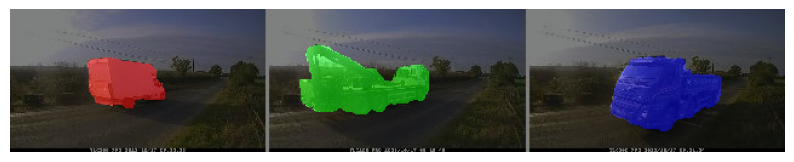

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = 'dataset/WSPTrafficView/train/0.png'
mask_path = 'dataset/WSPTrafficView/train/0.npy'

image = cv2.imread(image_path)
mask = np.load(mask_path)


color_map = {
    0: (0, 0, 0),        # Black background
    1: (255, 0, 0),      # Red for class 1
    2: (0, 255, 0),      # Green for class 2
    3: (0, 0, 255)       # Blue for class 3
}

colored_mask = np.zeros((mask.shape[0], mask.shape[1], 3), dtype=np.uint8)

for class_id, color in color_map.items():
    colored_mask[mask == class_id] = color

alpha = 0.5  # Transparency factor

# Convert image to RGB (OpenCV loads images in BGR)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Blend images
overlay = cv2.addWeighted(image_rgb, 1 - alpha, colored_mask, alpha, 0)

plt.figure(figsize=(10, 10))
plt.imshow(overlay)
plt.axis('off')
plt.show()

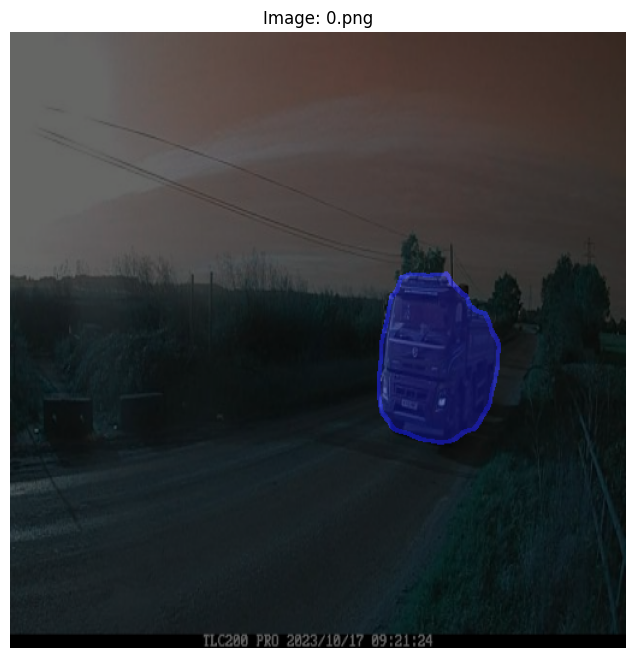

In [33]:
import cv2
import matplotlib.pyplot as plt

image1 = cv2.imread('outputs/test_results/version_3/62.png')

image1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(figsize=(12, 8))

ax.imshow(image1_rgb)
ax.axis('off')
ax.set_title('Image: 0.png')

plt.show()
